<a href="https://colab.research.google.com/github/beabosss/Microbe-Lab/blob/main/Microbe_Lab_Bea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROBE Lab (Bea)

In [2]:
pip install Scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("growth_rate_T.csv")
df.head()

,Time (h),Sample 1,Sample 2,Sample 3
0,0.00,0.085,0.083,0.095
1,1.11,0.097,0.095,0.099
2,2.11,0.116,0.114,0.119
3,3.15,0.144,0.140,0.149
4,4.05,0.167,0.162,0.171


Plot of OD vs time (h)

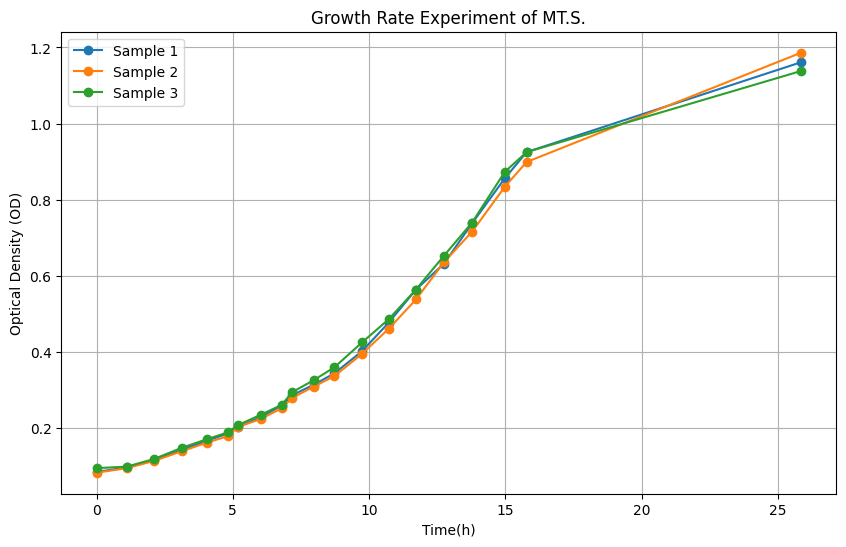

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['Time (h)'], df['Sample 1'], marker='o', label= 'Sample 1')
plt.plot(df['Time (h)'], df['Sample 2'], marker='o', label= 'Sample 2')
plt.plot(df['Time (h)'], df['Sample 3'], marker='o', label= 'Sample 3')
plt.xlabel('Time(h)')
plt.ylabel('Optical Density (OD)')
plt.title('Growth Rate Experiment of MT.S.')
plt.legend()
plt.grid(True)
plt.show()

Find growth rate: identify growth phases


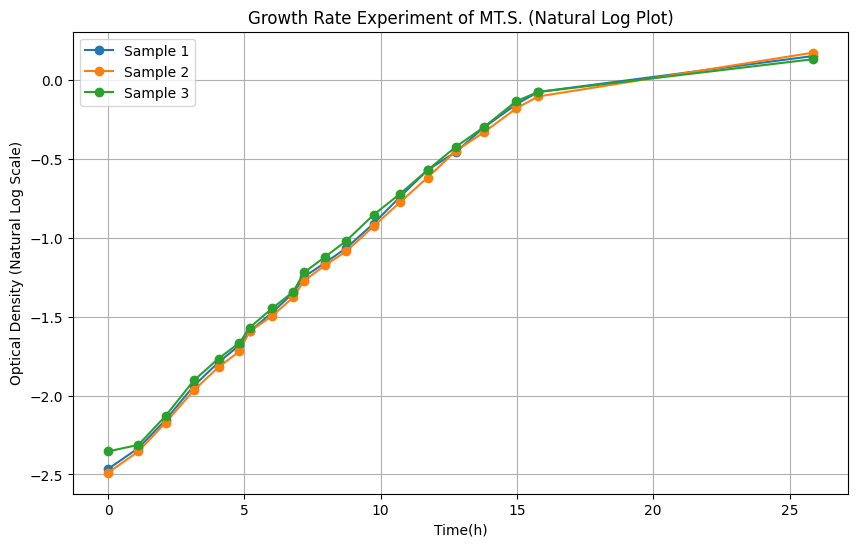

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df['Time (h)'], np.log(df['Sample 1']), marker='o', label= 'Sample 1')
plt.plot(df['Time (h)'], np.log(df['Sample 2']), marker='o', label= 'Sample 2')
plt.plot(df['Time (h)'], np.log(df['Sample 3']), marker='o', label= 'Sample 3')
plt.xlabel('Time(h)')
plt.ylabel('Optical Density (Natural Log Scale)')
plt.title('Growth Rate Experiment of MT.S. (Natural Log Plot)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

Only select part of the graph where Semi-log Plot is linear: t=5h to t=12h


Perform a linear regression to compute the specific growth rate

In [18]:
df_exponential = df[(df['Time (h)']>=5)&(df['Time (h)']<=12)]
display(df_exponential)

,Time (h),Sample 1,Sample 2,Sample 3
6,5.19,0.203,0.203,0.208
7,6.02,0.229,0.224,0.235
8,6.79,0.259,0.252,0.261
9,7.19,0.287,0.280,0.295
10,7.97,0.314,0.309,0.326
11,8.73,0.344,0.337,0.360
12,9.74,0.402,0.395,0.425
13,10.72,0.477,0.461,0.486
14,11.72,0.564,0.538,0.564


_specific_growth_rates = {}_, initializes an empty dictionary named specific_growth_rates. This dictionary will be used to store the calculated specific growth rate for each sample. The keys of the dictionary will be the sample names (e.g., 'Sample 1', 'Sample 2', 'Sample 3'), and the corresponding values will be the calculated specific growth rates.

In [19]:
from scipy.stats import linregress

specific_growth_rates = {}

for sample in ['Sample 1', 'Sample 2', 'Sample 3']:
  #Calculate the natural logarithm of the growth rate data
  log_growth_rate = np.log(df_exponential[sample])

  #Perform a linear regression
  slope, intercept, r_value, p_value, std_err = linregress(df_exponential['Time (h)'],log_growth_rate)

  #The slope is the specific growth rate
  specific_growth_rates[sample]=slope

  #Print calculated specific growth rates
  print(f"Specific growth rate for {sample}: {specific_growth_rates[sample]:.4f} h⁻¹")
  print(f"std_err: {std_err}")
  print(f"r_value: {r_value}")
  print(f"p_value: {p_value}")


Specific growth rate for Sample 1: 0.1542 h⁻¹
std_err: 0.0030153843786477432
r_value: 0.9986636990273525
p_value: 2.86838656268066e-10
Specific growth rate for Sample 2: 0.1498 h⁻¹
std_err: 0.0027177109339636724
r_value: 0.9988494564778794
p_value: 1.6990721898951005e-10
Specific growth rate for Sample 3: 0.1535 h⁻¹
std_err: 0.003135428845196996
r_value: 0.9985420002228393
p_value: 3.891099840803115e-10
